## Introdução

### Classificação de porcos ou cachorros Supervisionado


In [1]:
#Features
#pelo longo?
# perna curtas?
# faz auau?

porco1 =[0,1,0]
porco2 = [0,1,1]
porco3 = [1,1,0]

cachorro1 = [0,1,1]
cachorro2 = [1,0,1]
cachorro3 = [1,1,1]

# 1 porco
# 0 cachorro
train_x = [porco1,porco2,porco3,cachorro1,cachorro2,cachorro3]
train_y = [1,1,1,0,0,0] #labels

In [2]:
from sklearn.svm import LinearSVC
model = LinearSVC()
model.fit(train_x, train_y)

LinearSVC()

In [3]:
animal = [1,1,1]

In [4]:
model.predict([animal])

array([0])

Testes

In [5]:
animal1 = [1,1,1]
animal2 = [1,1,0]
animal3 = [0,1,1]
test_x = [animal1,animal2,animal3]
test_y = [0,1,1]



In [6]:
previsoes = model.predict(test_x)
previsoes == test_y

array([ True,  True, False])

In [7]:
previsoes


array([0, 1, 0])

In [8]:
test_y

[0, 1, 1]

In [9]:
corretos = (previsoes == test_y).sum()
total = len(test_y)
corretos

2

In [10]:
acerto = corretos/total
round(acerto*100)

67

In [11]:
from sklearn.metrics import accuracy_score

In [12]:
accuracy =  accuracy_score(test_y, previsoes)
print(f' A taxa de acerto é {round(accuracy,2)*100}%')

 A taxa de acerto é 67.0%


## Projeto 2

In [13]:
import pandas as pd


In [14]:
url = 'https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv'
df = pd.read_csv(url, sep = ',')
df.head()

,home,how_it_works,contact,bought
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


In [15]:
x = df[['home', 'how_it_works', 'contact',]]
y = df['bought']

In [16]:
x.head()
y.head()

0    0
1    0
2    0
3    0
4    0
Name: bought, dtype: int64

In [17]:
df.shape

(99, 4)

In [18]:
train_x = x[:75]
train_y = y[:75]
test_x = x[75:]
test_y = y[75:]

In [19]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
model = LinearSVC()
model.fit(train_x, train_y)

LinearSVC()

In [20]:
previsoes = model.predict(test_x)


In [21]:
accuracy_score(test_y, previsoes)
print(f"Acuracia: {round(accuracy_score(test_y, previsoes),2)*100}%")

Acuracia: 96.0%


In [22]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25)

### Usando sklearn para test e train

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25,
                                                    random_state=20, stratify= y)

model = LinearSVC()
model.fit(train_x, train_y)
previsoes = model.predict(test_x)

accuracy_score(test_y, previsoes)
print(f"Acuracia: {round(accuracy_score(test_y, previsoes),2)*100}%")

Acuracia: 96.0%


In [24]:
train_y.value_counts()

0    49
1    25
Name: bought, dtype: int64

In [25]:
49/25

1.96

In [26]:
test_y.value_counts()

0    17
1     8
Name: bought, dtype: int64

In [27]:
17/8

2.125

## Dataset projeto web

In [28]:
url = 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'

In [29]:
df = pd.read_csv(url, sep = ',')

In [30]:
df.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [31]:
df.describe()

,unfinished,expected_hours,price
count,2157.000000,2157.000000,2157.000000
mean,0.474270,50.515531,3140.696801
std,0.499453,28.589513,5079.220196
min,0.000000,1.000000,100.000000
25%,0.000000,26.000000,247.000000
50%,0.000000,51.000000,685.000000
75%,1.000000,75.000000,3668.000000
max,1.000000,100.000000,30223.000000


In [32]:
df.isnull().sum()

unfinished        0
expected_hours    0
price             0
dtype: int64

In [33]:
df['finalized'] = df['unfinished'].map({0:1, 1:0})

In [34]:
df.head()

,unfinished,expected_hours,price,finalized
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [35]:
df = df.drop(columns = ['unfinished'])

In [36]:
df.head()

,expected_hours,price,finalized
0,26,192,0
1,88,9015,0
2,89,2577,0
3,42,275,0
4,39,170,0


In [37]:
df.tail()

,expected_hours,price,finalized
2152,80,7518,1
2153,52,1332,0
2154,40,473,1
2155,75,5324,1
2156,37,377,0


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline 

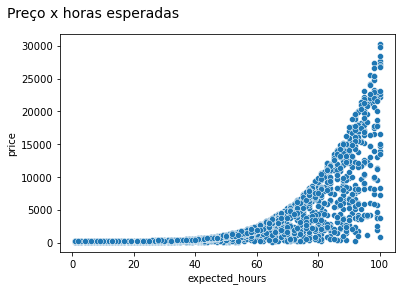

In [39]:
ax = sns.scatterplot(x = 'expected_hours', y ='price', data =df)
ax.set_title('Preço x horas esperadas', x = 0.1, y = 1.05, fontsize = 14)
plt.show()

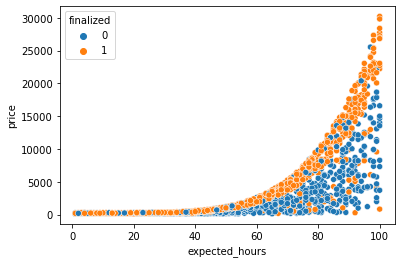

In [40]:
sns.scatterplot(x = 'expected_hours', y ='price', hue = 'finalized', data =df)
ax.set_title('Preço x horas esperadas', x = 0.1, y = 1.05, fontsize = 14)
plt.show()

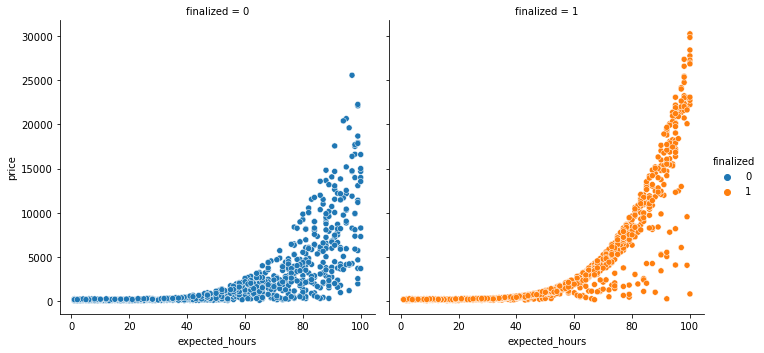

In [41]:
sns.relplot(x = 'expected_hours', y ='price',  hue = 'finalized', col = 'finalized', data =df)
plt.show()

In [42]:
x = df[['expected_hours', 'price']]
y = df['finalized']

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25,
                                                    random_state= 5, stratify= y)

model = LinearSVC()
model.fit(train_x, train_y)
previsoes = model.predict(test_x)

accuracy_score(test_y, previsoes)
print(f"Acuracia: {round(accuracy_score(test_y, previsoes),2)*100}%")
print(f"Treinado com {len(train_x)} e testado com {len(test_x)}")

c:\Users\marcu\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Acuracia: 53.0%
Treinado com 1617 e testado com 540


In [44]:
import numpy as np
previsoes_base = np.ones(540) #baseline

In [45]:
print(f"Acuracia: {round(accuracy_score(test_y, previsoes_base),2)*100}%")

Acuracia: 53.0%


O algortimo não é tão bom. Pois, se chutarmos que todos projetos foram concluidos, há pouca diferença.

#### Curva de decisão
Usado em duas dimensões, para visualizar a decisão do algoritmo.

In [46]:
x_min = test_x['expected_hours'].min()
x_max =test_x['expected_hours'].max()
y_min = test_x.price.min()
y_max = test_x.price.max()
print(x_min, x_max, y_min, y_max)

1 100 100 30223


In [47]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max-x_min)/pixels)
eixo_y = np.arange(y_min, y_max, (y_max-y_min)/pixels)

In [48]:
#Devolve cada eixo repetido 100 vezes
xx,yy = np.meshgrid(eixo_x, eixo_y)
xx

array([[ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       ...,
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01]])

In [49]:
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.992177e+04],
       [9.802000e+01, 2.992177e+04],
       [9.901000e+01, 2.992177e+04]])

In [50]:
Z = model.predict(pontos)
Z.shape

c:\Users\marcu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


(10000,)

In [51]:
Z = Z.reshape(xx.shape) #Redmensiona para 100x100

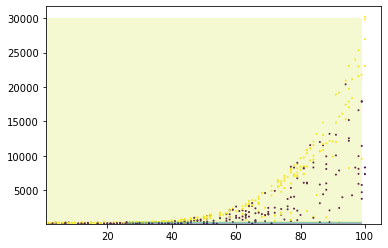

In [52]:
plt.scatter(test_x['expected_hours'], test_x['price'], c = test_y, s=1)
plt.contourf(xx, yy,Z, alpha = 0.2)
plt.show()

Curva de decisão péssima, pois chutou que iria finalizar tudo.

Plotando com outro seed

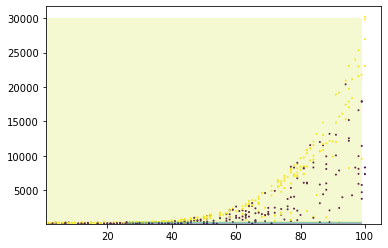

In [53]:
plt.scatter(test_x['expected_hours'], test_x['price'], c = test_y, s=1)
plt.contourf(xx, yy,Z, alpha = 0.2)
plt.show()

Como o padrão do seed é o np.random, pode usar:
SEED = 5
np.random.seed(SEED)

### Usando SVC para analisar melhor a curva dos dados

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(train_x), len(test_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

model = SVC()
model.fit(treino_x, treino_y)
previsoes = model.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 66.85%


In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

SEED = 20
np.random.seed(SEED)
raw_train_x, raw_test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25,
                                                    stratify= y)

scaler = StandardScaler()
scaler.fit(raw_train_x)
treino_x = scaler.transform(raw_train_x)
teste_x = scaler.transform(raw_test_x)

model = SVC(gamma='auto')
model.fit(train_x, train_y)
previsoes = model.predict(test_x)

accuracy_score(test_y, previsoes)
print(f"Acuracia: {round(accuracy_score(test_y, previsoes),2)*100}%")

Acuracia: 51.0%


c:\Users\marcu\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


<Figure size 720x720 with 0 Axes>

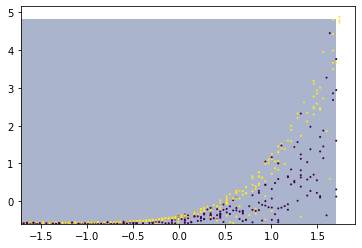

<Figure size 720x720 with 0 Axes>

In [56]:
data_x = teste_x[:,0]
data_y = teste_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = model.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha = 0.43)
plt.scatter(data_x, data_y, c=test_y, s=1)
plt.figure(figsize=(10,10))

## Dataset carros

In [57]:
import pandas as pd
uri = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
dados = pd.read_csv(uri)

In [58]:
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [59]:
dados['sold'] = dados['sold'].map({'yes': 1, 'no': 0})

In [60]:
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [61]:
from datetime import datetime
ano_atual = datetime.today().year
dados['idade'] = ano_atual - dados[['model_year']]

In [62]:
dados['km_ano'] = dados['mileage_per_year'] * 1.60934

In [63]:
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold,idade,km_ano
0,0,21801,2000,30941.02,1,22,35085.22134
1,1,7843,1998,40557.96,1,24,12622.05362
2,2,7109,2006,89627.50,0,16,11440.79806
3,3,26823,2015,95276.14,0,7,43167.32682
4,4,7935,2014,117384.68,1,8,12770.11290


In [64]:
dados = dados.drop(columns= ['Unnamed: 0', 'model_year', 'mileage_per_year'], axis=1)


In [65]:
dados.head()

,price,sold,idade,km_ano
0,30941.02,1,22,35085.22134
1,40557.96,1,24,12622.05362
2,89627.50,0,16,11440.79806
3,95276.14,0,7,43167.32682
4,117384.68,1,8,12770.11290


Modelo linear (LINEAR SVC)

In [66]:
x = dados[['price', 'idade', 'km_ano']]
y = dados['sold']

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25,
                                                    random_state= 5, stratify= y)

model = LinearSVC()
model.fit(train_x, train_y)
previsoes = model.predict(test_x)

accuracy_score(test_y, previsoes)
print(f"Acuracia: {round(accuracy_score(test_y, previsoes),2)*100}%")
print(f"Treinado com {len(train_x)} e testado com {len(test_x)}")

Acuracia: 57.99999999999999%
Treinado com 7500 e testado com 2500


c:\Users\marcu\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [67]:
# np.ones(2500)

from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier()
dummy_stratified.fit(train_x, train_y)
previseos = dummy_stratified.predict(test_x)

accuracy_score(test_y, previsoes)
print(f"Acuracia do  duumy stratified : {round(accuracy_score(test_y, previsoes),2)*100}%")
print(f"Treinado com {len(train_x)} e testado com {len(test_x)}")


Acuracia do  duumy stratified : 57.99999999999999%
Treinado com 7500 e testado com 2500
